/Users/ss4338/opt/anaconda3/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


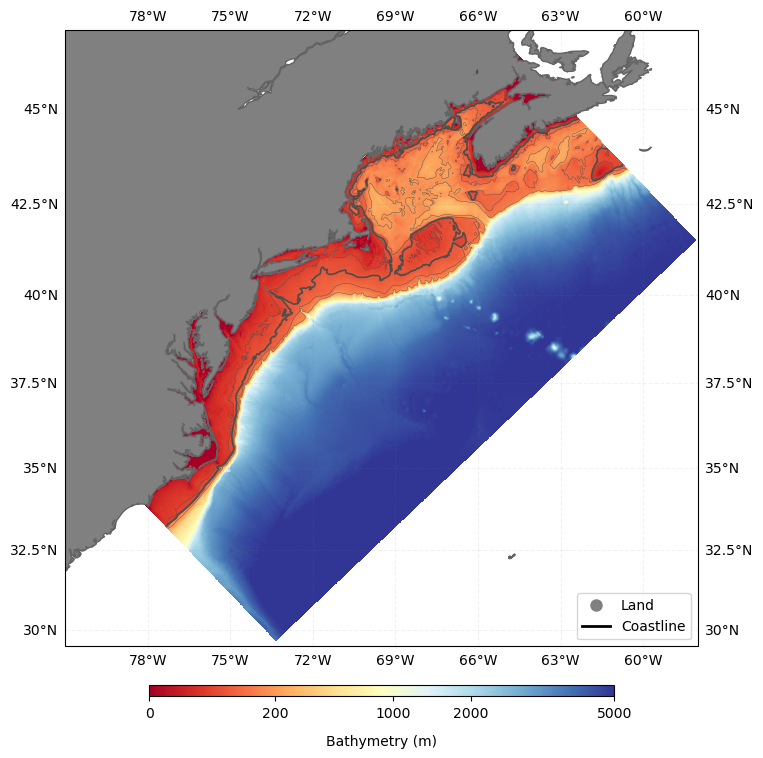

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import scipy.io as sio
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE

# Load .mat file
mat_contents = sio.loadmat('/Users/ss4338/Downloads/Figure1.mat')

# Extract necessary variables from .mat file
lon_rho = mat_contents['lon_rho']
lat_rho = mat_contents['lat_rho']
h = mat_contents['h']
mask_rho = mat_contents['mask_rho']

# Other variables
plot_blowup = 1
plot_full_domain = 1

# Define boundaries
if plot_blowup == 1:
    lon1 = -72.5
    lon2 = -69.5
    lat1 = 39.5
    lat2 = 41.5

# Create projection
if plot_full_domain == 1:
    projection = ccrs.Mercator(central_longitude=(lon_rho.min()+lon_rho.max())/2,
                               min_latitude=29.5, max_latitude=47)
else:
    projection = ccrs.Mercator(central_longitude=(lon_rho.min()+lon_rho.max())/2,
                               min_latitude=36, max_latitude=44)

fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=projection))

# Define the cartographic features
land = NaturalEarthFeature(
    category='physical', 
    name='land', 
    scale='10m', 
    facecolor='0.5',  # Gray color
    edgecolor='0.4',  # Darker gray color
)

if plot_full_domain ==1:
    ax.set_extent([-81, -58, 29.5, 47])
else:
    ax.set_extent([-78, -60, 36, 44])

# add land and coastline features to the map
ax.add_feature(land)
ax.add_feature(COASTLINE, edgecolor='0.3',linewidths=0.1)


# Create a filled contour plot
import matplotlib.colors as mcolors
# Apply a power-law normalization
norm = mcolors.PowerNorm(gamma=0.4, vmin=h.min(), vmax=h.max())

p = ax.pcolormesh(lon_rho, lat_rho, h, cmap= 'RdYlBu', norm=norm, transform=ccrs.PlateCarree())

# Add contour lines
c = ax.contour(lon_rho, lat_rho, h, levels=[40, 100, 200], colors='0.3', linewidths=0.3, transform=ccrs.PlateCarree())
d = ax.contour(lon_rho, lat_rho, h, levels=[65], colors='0.3', linewidths=1.2, transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidths=0.2, color='grey', alpha=0.1, linestyle='--')

# Add Coastlines
# ax.coastlines(color='0.2', linewidths=0.2)

# Add a text
# ax.text(-75.4, 36.8, 'Middle Atlantic Bight', transform=ccrs.PlateCarree(), rotation=60, fontsize=10)
# Add a colorbar
# Add a colorbar inside the plot
cbar = plt.colorbar(p, ax=ax, orientation='horizontal', ticks=[0, 200, 1000,2000, 5000], shrink=0.6, aspect=40, pad=0.05)
cbar.set_label('Bathymetry (m)', labelpad=10)

# Set the colorbar tick labels font size
cbar.ax.tick_params(labelsize=10)

# Set the colorbar tick locations
# cbar.ax.xaxis.set_major_locator(MultipleLocator(100))

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='0.5', markersize=10, label='Land'),
    plt.Line2D([0], [0], marker='None', color='k', linestyle='-', linewidth=2, label='Coastline')
]
ax.legend(handles=legend_elements, loc='lower right')
plt.savefig('Bathymetry.pdf', dpi=1000)

plt.show()
